In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("50_Startups.csv")

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.isnull().sum() # checking null values 

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
df.corr()  # correlation checking 

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

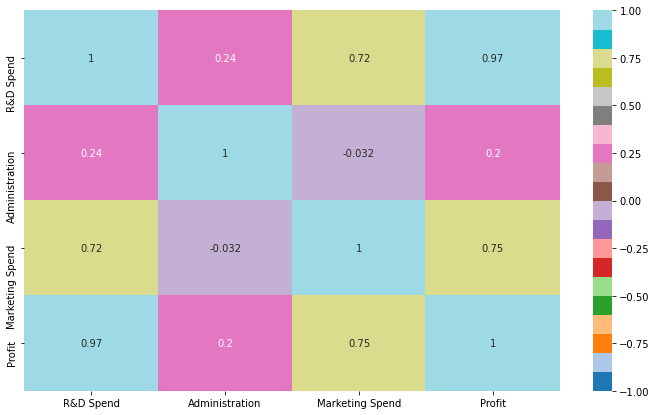

In [15]:
plt.figure(figsize = (12,7))
sns.heatmap(df.corr(),vmin = -1 , vmax = 1 , cmap = 'tab20',annot = True)

In [16]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [17]:
df['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [18]:
len(df)

50

In [19]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [20]:
a = pd.get_dummies(df['State'],drop_first = True)  # dummies 

In [22]:
a.head()

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [23]:
df = df.drop(['State'] , axis = 1)

In [24]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [25]:
df = pd.concat([df , a] , axis = 1)

In [26]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [27]:
X = df.drop(['Profit'],axis = 1)

In [28]:
X.head() # independent columns

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [29]:
y = df['Profit']  # depedent column

In [30]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X , y , test_size = 0.33 , random_state = 42)

In [39]:
X_train.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
46,1315.46,115816.21,297114.46,1,0
47,0.00,135426.92,0.00,0,0
15,114523.61,122616.84,261776.23,0,1
9,123334.88,108679.17,304981.62,0,0
16,78013.11,121597.55,264346.06,0,0


In [40]:
X_test.head()

,R&D Spend,Administration,Marketing Spend,Florida,New York
13,91992.39,135495.07,252664.93,0,0
39,38558.51,82982.09,174999.30,0,0
30,61994.48,115641.28,91131.24,1,0
45,1000.23,124153.04,1903.93,0,1
17,94657.16,145077.58,282574.31,0,1


In [41]:
y_train.head()

46     49490.75
47     42559.73
15    129917.04
9     149759.96
16    126992.93
Name: Profit, dtype: float64

In [42]:
y_test.head()

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
Name: Profit, dtype: float64

In [43]:
len(X_train) , len(y_train)

(33, 33)

In [44]:
len(X_test) , len(y_test)

(17, 17)

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
reg = LinearRegression()

In [47]:
reg.fit(X_train , y_train)   # y = m1x1 + m2x2 + ... + c

LinearRegression()

In [48]:
reg.coef_

array([ 8.04312540e-01, -8.99140461e-02,  2.84812890e-02,  4.03924487e+02,
       -1.21407965e+03])

In [49]:
reg.intercept_

57183.41295217193

In [50]:
from sklearn.metrics import r2_score

In [51]:
y_train_pred = reg.predict(X_train)

In [52]:
y_train[:10]

46     49490.75
47     42559.73
15    129917.04
9     149759.96
16    126992.93
24    108552.04
34     96712.80
31     97483.56
0     192261.83
44     65200.33
Name: Profit, dtype: float64

In [53]:
y_train_pred[:10]

array([ 56694.07716541,  45006.63062018, 144512.857242  , 155297.68934747,
       116525.92444407, 113013.76150971,  86349.3742125 ,  93924.61183384,
       190089.75258858,  61909.01028595])

In [54]:
r2_score(y_train,y_train_pred)

0.9483841429755522

In [55]:
r2_score(y_train,y_train_pred) * 100 

94.83841429755522

In [56]:
y_test_pred = reg.predict(X_test)

In [57]:
r2_score(y_test , y_test_pred)

0.9475312056928278

In [58]:
r2_score(y_test , y_test_pred) * 100

94.75312056928277

In [60]:
X_train.head(1)

,R&D Spend,Administration,Marketing Spend,Florida,New York
46,1315.46,115816.21,297114.46,1,0


In [61]:
y_train.head(1)

46    49490.75
Name: Profit, dtype: float64

In [63]:
reg.predict([[1315.46 ,115816.21,297114.46,1,0]])

array([56694.07716541])

In [64]:
reg.predict([[1,2,3,0,0]])

array([57184.12288049])

In [ ]:
# 94.75312056928277   